<a href="https://colab.research.google.com/github/jimvic37/Space_Mission_Anlaysis/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center>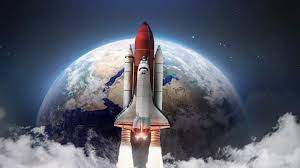</center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install Package to convert country values into ISO value

In [ ]:
%pip install country_converter --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import country_converter as coco


### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launched.csv')

# Preliminary Data Exploration



In [ ]:
print(f"df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

df_data has 18417 rows and 8 columns


In [ ]:
df_data.sample(10)

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_status,Price,Mission_status
4751,4751,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Sep 25, 1975 4:49 AM CDT",Soyuz U | Cosmos 771,Retired,NaN,Success
2211,2211,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan","Sun Nov 10, 1968 1:11 PM GMT-6",Proton-K/Block D | Zond 6,Retired,NaN,Success
6736,6736,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Sep 26, 1980 5:10 AM CDT",Soyuz U | Cosmos 1212,Retired,20.0,Success
4568,4568,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Wed Apr 24, 1974 6:50 AM CDT",Vostok-2M | Meteor n°28,Retired,NaN,Success
10430,10430,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Sep 20, 1990 3:16 PM CDT",Molniya-M /Block ML | Molniya-3 n°145,Retired,NaN,Success
7642,7642,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Tue May 25, 1982 4:00 AM CDT",Soyuz U | Cosmos 1369,Retired,20.0,Success
1684,1684,General Dynamics,"SLC-36B, Cape Canaveral SFS, Florida, USA","Tue Nov 7, 1967 1:39 AM GMT-6",Atlas-SLV3C Centaur-D | Surveyor 6,Retired,"1,160.0",Success
9797,9797,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Aug 28, 1988 11:23 PM CDT",Soyuz U2 | Soyuz TM-6,Retired,NaN,Success
12425,12425,Lockheed,"SLC-41, Cape Canaveral SFS, Florida, USA","Wed Aug 12, 1998 6:30 AM CDT",Titan IV(401)A | NROL-7 (Mercury),Retired,NaN,Failure
14880,14880,CASC,"LC-2, Xichang Satellite Launch Center, China","Fri Dec 20, 2013 10:42 AM CST",Long March 3B/E | Túpac Katari 1,Active,29.15,Success


In [ ]:
# Listing column names of df_data
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_status', 'Price', 'Mission_status'],
      dtype='object')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      18417 non-null  int64 
 1   Organisation    18417 non-null  object
 2   Location        18417 non-null  object
 3   Date            18417 non-null  object
 4   Detail          18417 non-null  object
 5   Rocket_status   18417 non-null  object
 6   Price           8130 non-null   object
 7   Mission_status  18417 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
# From df_data.info() can tell price column has NaN values
# Checking whether data frame has NaN values 
print(f"Any NaN values? {df_data.isna().values.any()}")

Any NaN values? True


In [ ]:
# Which column has NaN values, and how many there are
df_data.isna().sum()

Unnamed: 0            0
Organisation          0
Location              0
Date                  0
Detail                0
Rocket_status         0
Price             10287
Mission_status        0
dtype: int64

In [ ]:
# Price section can be used for caculation as integer, so changing every NaN values to 0
df_data.fillna(value=0, inplace = True)

In [ ]:
# Double checking after replacing NaN values
print(f"Any NaN values? {df_data.isna().values.any()}")

Any NaN values? False


In [ ]:
# Chekcing whether data frame has duplicated values
print(f"Any duplicated values? {df_data.duplicated().values.any()}")

Any duplicated values? False


## Data Cleaning - Check for Missing Values and Duplicates


In [ ]:
# Renaming Organisation to Organization
df_data.rename(columns=({"Organisation": "Organization"}), inplace=True)

In [ ]:
# Chekcing whehter name changed
df_data.sample()

,Unnamed: 0,Organization,Location,Date,Detail,Rocket_status,Price,Mission_status
7096,7096,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Fri Aug 21, 1981 5:20 AM CDT",Soyuz U | Cosmos 1298,Retired,0,Success


In [ ]:
# Dropping junk column
df_data.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_status,Price,Mission_status
0,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 6, 1957 10:44 AM GMT-6",Vanguard | Vanguard TV3,Retired,20.0,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sat Nov 2, 1957 8:30 PM GMT-6",Sputnik 8K71PS | Sputnik 2,Retired,0,Failure
2,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 4, 1957 2:28 PM GMT-5",Sputnik 8K71PS | Sputnik 1,Retired,0,Success
3,US Air Force,"LC-11, Cape Canaveral SFS, Florida, USA","Thu Dec 18, 1958 5:02 PM GMT-6",SM-65B Atlas | SCORE,Retired,0,Success
4,ABMA,"LC-5, Cape Canaveral SFS, Florida, USA","Fri Dec 5, 1958 11:44 PM GMT-6",Juno II | Pioneer 3,Retired,0,Success


## Type conversion


In [ ]:
# Changing Date column to datetime type, setting the timezone for all data to single timezone for better analyzing
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

/usr/local/lib/python3.8/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.8/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
# Changeing Date column to Dattimeindex to extract only the date information of the Date column not including the time information
df_data.Date = pd.DatetimeIndex(df_data.Date).date
df_data.Date = pd.to_datetime(df_data.Date)

In [ ]:
# Chekcing whehter type conversion was successful
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organization    18417 non-null  object        
 1   Location        18417 non-null  object        
 2   Date            18417 non-null  datetime64[ns]
 3   Detail          18417 non-null  object        
 4   Rocket_status   18417 non-null  object        
 5   Price           18417 non-null  object        
 6   Mission_status  18417 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1007.3+ KB


In [ ]:
# Replacing "," in Price column with empty value to prepare for conversion
df_data.Price = df_data.Price.astype(str).str.replace(",","")

In [ ]:
# Changing Price column type to numeric type(float) 
df_data.Price = pd.to_numeric(df_data.Price)

In [ ]:
# Chekcing whehre type conversion was successful
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organization    18417 non-null  object        
 1   Location        18417 non-null  object        
 2   Date            18417 non-null  datetime64[ns]
 3   Detail          18417 non-null  object        
 4   Rocket_status   18417 non-null  object        
 5   Price           18417 non-null  float64       
 6   Mission_status  18417 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1007.3+ KB


## Descriptive Statistics

In [ ]:
# First launch of space craft
df_data.Date.min()

Timestamp('1957-10-04 00:00:00')

In [ ]:
# Last launch of space craft
df_data.Date.max()

Timestamp('2023-02-23 00:00:00')

In [ ]:
df_data.Price.describe()

count   18,417.00
mean       125.88
std        702.94
min          0.00
25%          0.00
50%          0.00
75%         29.15
max     15,000.00
Name: Price, dtype: float64

# Number of Launches per Organization


In [ ]:
# Subsetting data frame to get number of launches per organization
# Number of launches per organization differe dramaticlly, hard to visualize on chart
launch_per_org = df_data.Organization.value_counts().sort_values(ascending=False)
launch_per_org

RVSN USSR       7562
US Air Force    1604
CASC            1472
Roscosmos        875
VKS RF           867
                ... 
IRGC               3
OneSpace           2
Douglas            2
GK LS              2
ABL SS             1
Name: Organization, Length: 61, dtype: int64

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
# Printing out the retired rocket count vs rocekt active count
rocket = df_data.Rocket_status.value_counts()
rocket
print(f"Rocket retired count: {rocket.values[0]}\nRocekt active count: {rocket.values[1]}")

Rocket retired count: 14433
Rocekt active count: 3984


In [ ]:
# Plotting pie chart to visualize active rockets vs retired rockets
r_pie = px.pie(labels=np.array(rocket.index), values=np.array(rocket.values), names=rocket.index,hole=0.4,title="<b>1957-2023 Launched Rockets: Active Rockets vs Retired Rockets</b>",width=1000, height=500)
r_pie.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
r_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
# Subsetting data frame by counting the missions by it's mission status 
mission = df_data.Mission_status.value_counts()
mission

Success              16973
Failure               1110
Partial Failure        310
Prelaunch Failure       24
Name: Mission_status, dtype: int64

In [ ]:
# Plotting pie chart to visualize the count of each mission status
m_pie = px.pie(labels=np.array(mission.index), values=np.array(mission.values), names=mission.index, title="<i><b>1957-2023 Spacecraft mission status</b></i>", width=1000, height=600, 
               color_discrete_sequence=['darkblue','royalblue','cyan','lightcyan'])
m_pie.update_traces(textposition='outside', textfont_size=12, textinfo='label+text+value', showlegend=False)
m_pie.show()


# How Expensive are the Launches? 

The price column is given in USD millions. 

In [ ]:
# Subsetting data frame to only include data that has a price value in it. (Remember many price value was not known)
price_not_zero = df_data[df_data.Price > 0]

In [ ]:
# Plotting a histogram to visualize the data, checking price distribution 
plt.figure(figsize=(14,8), dpi=200)
hist = px.histogram(price_not_zero, 
                   x='Price',
                   nbins=50,
                   color_discrete_sequence=['indianred'],
                   marginal='violin',
                   barmode="group",
                   title="1957-2023 Spacecraft mission launches prices excluding unknown",
                   range_x=(0, price_not_zero.Price.max()))
 
hist.update_layout(xaxis_title='Price in USD million',
                   yaxis_title='Price count')

hist.show()

<Figure size 2800x1600 with 0 Axes>

# Use of ISO alpha 3 code to Show the Number of Launches by Country in Choropleth Map 

* Yellow Sea refers to China
* Pacific Missile Range Facility refers to USA
* Barents Sea refers to Russian Federation
* Gran Canaria refers to USA




In [ ]:
# Inserting new column for country to get ISO value of each country
country = df_data.Location.str.split(',').str[-1]
df_data.insert(loc=7, column="Country", value=np.array(country.values))

In [ ]:
# Checking whether any non-country value is in the Country column
df_data.Country.value_counts()

 Russia                            5371
 USA                               5282
 Kazakhstan                        4381
 China                             1597
 France                             864
 Japan                              314
 India                              224
 New Zealand                        107
 Pacific Ocean                       71
 Iran                                37
 Israel                              31
 Kenya                               26
 Australia                           24
 Marshall Islands                    23
 Yellow Sea                          21
 South Korea                         13
 North Korea                         10
 Brazil                               9
 Barents Sea                          5
 Gran Canaria                         3
 Pacific Missile Range Facility       3
 United Kingdom                       1
Name: Country, dtype: int64

In [ ]:
# Pacific Ocean, Yellow Sea, Pacific Missile Range Facility, Barents Sea, Gran Canaria not a valid country
# Through reserach, figured each country name who launched the mission
# However, Pacific Ocean launch site was multinational and wasn't able to configure which mission was launched by which country
df_data.replace(to_replace = "Pacific Missile Range Facility", value="USA", inplace=True, regex=True)
df_data.replace(to_replace = "Barents Sea", value="Russia", inplace=True, regex=True)
df_data.replace(to_replace = "Gran Canaria", value="USA", inplace=True, regex=True)
df_data.replace(to_replace = "Yellow Sea", value="China", inplace=True, regex=True)
df_data.replace(to_replace = "USA", value="United States", inplace=True, regex=True)

In [ ]:
# Chekcing whether the data is clean
df_data.Country.value_counts()

 Russia              5376
 United States       5288
 Kazakhstan          4381
 China               1618
 France               864
 Japan                314
 India                224
 New Zealand          107
 Pacific Ocean         71
 Iran                  37
 Israel                31
 Kenya                 26
 Australia             24
 Marshall Islands      23
 South Korea           13
 North Korea           10
 Brazil                 9
 United Kingdom         1
Name: Country, dtype: int64

In [ ]:
# Moving to new data frame and filtering out any row that has value of Pacific ocean as their country value(71 of them) 
df_clean = df_data[df_data.Country !=" Pacific Ocean"]

In [ ]:
# Making Country column as pandas series to use country converter module
country_series = df_clean.iloc[:,7]
country_series

0          United States
1             Kazakhstan
2             Kazakhstan
3          United States
4          United States
              ...       
18412      United States
18413     United Kingdom
18414              China
18415              China
18416      United States
Name: Country, Length: 18346, dtype: object

In [ ]:
# Importing module
import country_converter as coco
cc = coco.CountryConverter()

In [ ]:
# Storing the iso codes
iso3_codes = cc.pandas_convert(series=country_series, to='ISO3', not_found=None)                  

In [ ]:
# Inserting ISO into data frame
df_clean.insert(loc=8, column="ISO", value=np.array(iso3_codes.values))

# Creating Choropleth Map to Show the Number of Failures by Country


In [ ]:
# Kazakhstan independed from russia on 1993-01-28, so before independence, the rocekt launches are conducted by Russia 
# Modifying ISO value of Kazakhstan where the date was before Kazakhstan independence from Russia to Russia ISO
kaz_indenpendence = pd.to_datetime('1993-01-28')
df_clean.loc[(df_clean.Date < kaz_indenpendence) & (df_clean.ISO == "KAZ"), 'ISO'] = "RUS"
df_clean.ISO.value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RUS    8434
USA    5288
CHN    1618
KAZ    1323
FRA     864
JPN     314
IND     224
NZL     107
IRN      37
ISR      31
KEN      26
AUS      24
MHL      23
KOR      13
PRK      10
BRA       9
GBR       1
Name: ISO, dtype: int64

In [ ]:
# Creating a data frame to get only data of failure by country
failure = df_clean.loc[(df_clean.Mission_status == "Failure")]
df_countries = failure.groupby('ISO', as_index=False).agg({'Mission_status': pd.Series.count})
df_countries.sort_values('Mission_status', ascending=False)
df_countries

,ISO,Mission_status
0,AUS,3
1,BRA,6
2,CHN,65
3,FRA,27
4,GBR,1
5,IND,26
6,IRN,20
7,ISR,9
8,JPN,18
9,KAZ,49


In [ ]:
# Creating a choropleth to visulaize count of failure by each country in a world map
plt.figure(figsize=(16,8), dpi=200)
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Mission_status', 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="1957-2023 Number of mission failures by Country")
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

<Figure size 3200x1600 with 0 Axes>

# Creating a Plotly Sunburst Chart of the countries, organizations, and mission status. 

In [ ]:
# Grouping by countries, organizations, and mission status.
country_org_mission = df_clean.groupby(by=['Country', 'Organization','Mission_status']).size().reset_index(name='count')
country_org_mission

,Country,Organization,Mission_status,count
0,Australia,ABMA,Success,5
1,Australia,CECLES,Failure,3
2,Australia,CECLES,Success,8
3,Australia,RAE,Success,8
4,Brazil,AEB,Failure,6
...,...,...,...,...
139,United States,Virgin Galactic,Failure,4
140,United States,Virgin Galactic,Partial Failure,4
141,United States,Virgin Galactic,Success,27
142,United States,Virgin Orbit,Failure,2


In [ ]:
# Plotting a sunburst plot for visulization
burst = px.sunburst(country_org_mission, 
                    path=['Country', 'Organization', 'Mission_status'], values= "count", color="Mission_status", width=800, height=800,
                    color_discrete_sequence=px.colors.qualitative.Pastel1)
burst.update_layout(title="<b>1957-2023 Mission status by each country, organization</b>")
burst.show()

# Analyzing the Total Amount of Money Spent by Organization on Space Missions

In [ ]:
# Creating data frame that contains the totla amount of money spent by organization on space missions
price_by_org = df_clean.groupby("Organization", as_index=False).agg({"Price": pd.Series.sum})

In [ ]:
# Sourcing out values where the sum of the price is 0(it can be interpretted as not known)
price_by_org = price_by_org[price_by_org.Price > 0]
price_by_org.sort_values("Price", inplace=True, ascending=False)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Pricinting out the values
# Values differ dramatically -- no chart
price_by_org

,Organization,Price
44,RVSN USSR,"851,155.44"
36,MHI,"554,977.50"
53,US Air Force,"212,730.00"
39,NASA,"157,524.46"
4,Arianespace,"151,906.00"
22,General Dynamics,"97,824.20"
10,CASC,"56,879.49"
52,ULA,"44,570.00"
50,SpaceX,"43,583.50"
38,Martin Marietta,"29,794.40"


# Analyzing Amount of Money Spent by Organization per Launch

In [ ]:
# Sourcing out data where price is 0 for better Analysing
price_by_launch = df_clean[df_clean.Price > 0]

In [ ]:
# Average money spent by organization per launch
price_by_launch_mean = price_by_launch.groupby("Organization", as_index=False).agg({"Price": pd.Series.mean})
price_by_launch_mean.sort_values("Price", inplace=True, ascending = False)
price_by_launch_mean

,Organization,Price
25,MHI,"3,171.30"
6,CAS Space,"2,000.00"
5,Boeing,871.81
36,US Air Force,597.56
17,General Dynamics,582.29
27,NASA,489.21
20,ISAS,386.43
3,Arianespace,378.82
29,RVSN USSR,354.35
2,ASI,267.67


In [ ]:
# Minimum money spent by organization per launch
price_by_launch_min = price_by_launch.groupby("Organization", as_index=False).agg({"Price": pd.Series.min})
price_by_launch_min.sort_values("Price", inplace=True, ascending = False)
price_by_launch_min

,Organization,Price
6,CAS Space,"2,000.00"
5,Boeing,133.00
35,ULA,109.00
19,ILS,65.00
38,UT,59.00
28,Northrop,40.00
24,Lockheed,35.00
23,Kosmotras,29.00
34,Starsem,23.00
15,GK LS,23.00


In [ ]:
# Maximum money spent by oragnization per launch
price_by_launch_max = price_by_launch.groupby("Organization", as_index=False).agg({"Price": pd.Series.max})
price_by_launch_max.sort_values("Price", inplace=True, ascending = False)
price_by_launch_max

,Organization,Price
25,MHI,"15,000.00"
3,Arianespace,"6,600.00"
17,General Dynamics,"5,900.00"
21,ISRO,"5,900.00"
29,RVSN USSR,"5,900.00"
5,Boeing,"3,849.00"
6,CAS Space,"2,000.00"
36,US Air Force,"1,887.00"
26,Martin Marietta,"1,887.00"
27,NASA,"1,825.00"


# Number of Launches per Year

In [ ]:
# Dropping 2023 Rocket launches since not many mission launched at the time of data collection(02/25/23) for better comparison per Year by Year
# Inserting Year column as integer value for the chart
this_year = pd.to_datetime('2023')
df_clean = df_clean[df_clean.Date < this_year]
year = df_clean.Date.dt.year
df_clean.insert(loc=3, column="Year", value=year)
df_clean.Year = df_clean.Year.astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Grouping by Year
launch_per_year = df_clean.groupby("Year").count().Date
launch_per_year

Year
1957      3
1958     28
1959     24
1960     70
1961     85
       ... 
2018    420
2019    287
2020    298
2021    607
2022    821
Name: Date, Length: 66, dtype: int64

In [ ]:
# Using rolling function to graph line chart as moving average
moving_average_year = launch_per_year.rolling(window=5).mean()

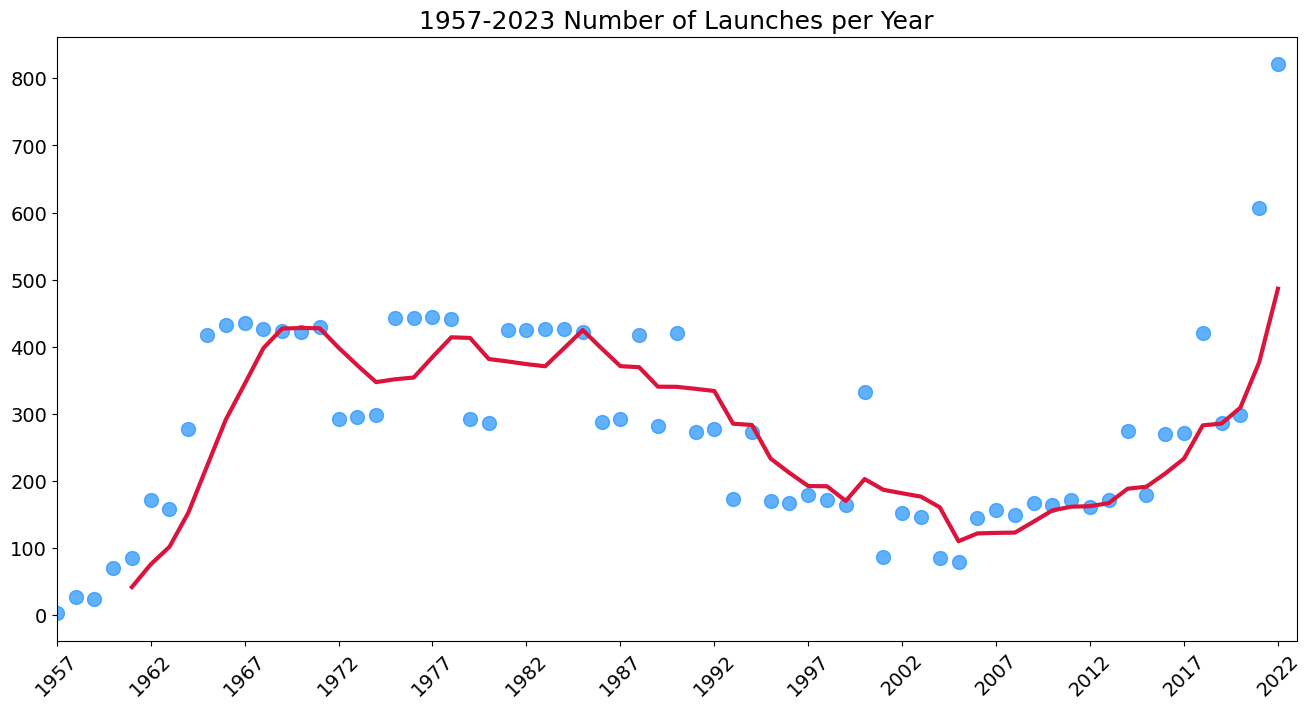

In [ ]:
# Graphing scatter and line chart for moving average by year
plt.figure(figsize=(16,8), dpi=100)
plt.title('1957-2023 Number of Launches per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1957, 2023, step=5), 
           fontsize=14, 
           rotation=45)

ax = plt.gca()
ax.set_xlim(1957, 2023)
ax.scatter(x=launch_per_year.index, 
           y=launch_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
ax.plot(launch_per_year.index, 
        moving_average_year.values, 
        c='crimson', 
        linewidth=3)

plt.show()

# Number of Launches Month-on-Month until the Present




Which month has seen the highest number of launches in all time?  

In [ ]:
# Inserting Month column for the chart
month = df_clean.Date.dt.month
df_clean.insert(loc=4, column="Month", value=month)
df_clean.month = df_clean.Month.astype(int)
df_clean.sort_values(by="Month", inplace=True)

<ipython-input-59-3541f14f3965>:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
# Grouping by year and month and count each year and month mission launches
df_monthly = df_clean.groupby(['Year', 'Month']).size().reset_index(name='count')

In [ ]:
# Creating a montly rolling average of every six month
rolling_montly_avg = df_monthly['count'].rolling(window=6).mean()

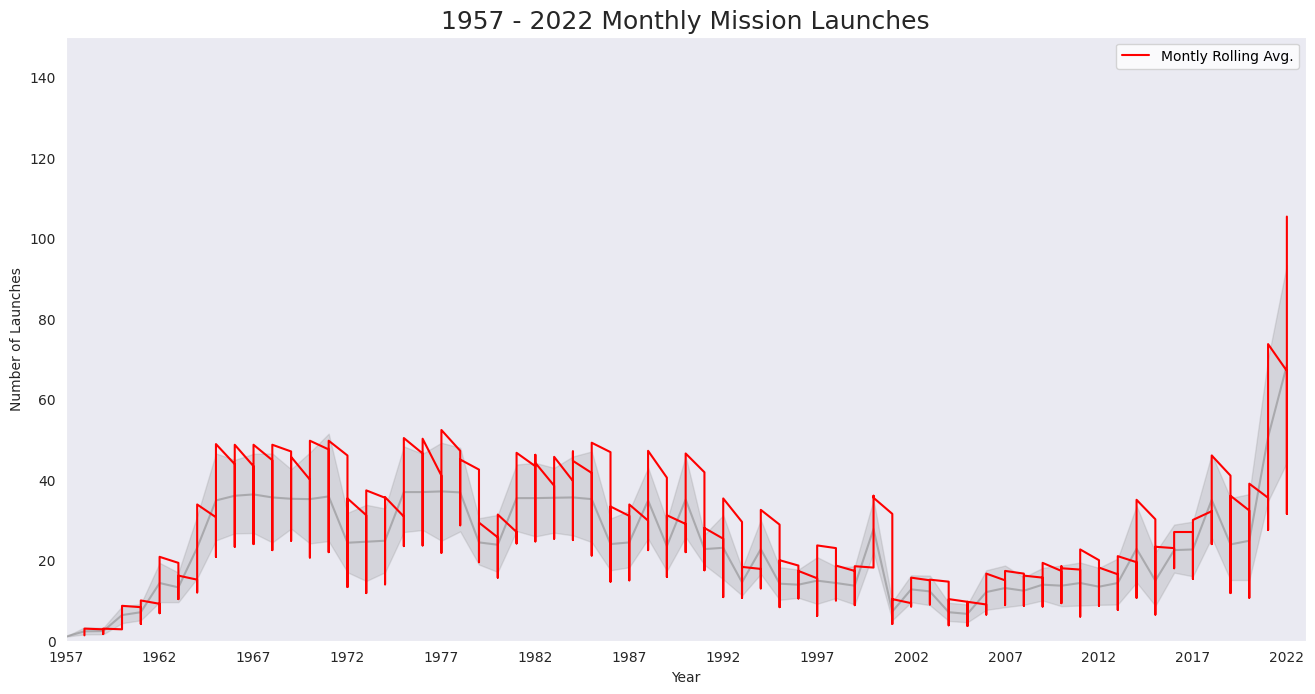

In [ ]:
# Plotting in a line plot of movtnly rolling average
plt.figure(figsize=(16,8),dpi=100)
with sns.axes_style('dark'):
    ax = sns.lineplot(x='Year', y='count', data=df_monthly, color='gray', alpha=0.5)
    ax.plot(df_monthly['Year'], rolling_montly_avg, color='red', label='Montly Rolling Avg.')
    ax.set_title('1957 - 2022 Monthly Mission Launches', fontdict={'fontsize': 18})
    ax.set_xlim(1957, 2023)
    ax.set_ylim(0,150)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Launches')
plt.xticks(np.arange(1957,2023,5))
plt.legend()
plt.show()

In [ ]:
# Grouping by month
launch_by_month = df_clean.groupby("Month").count().Date

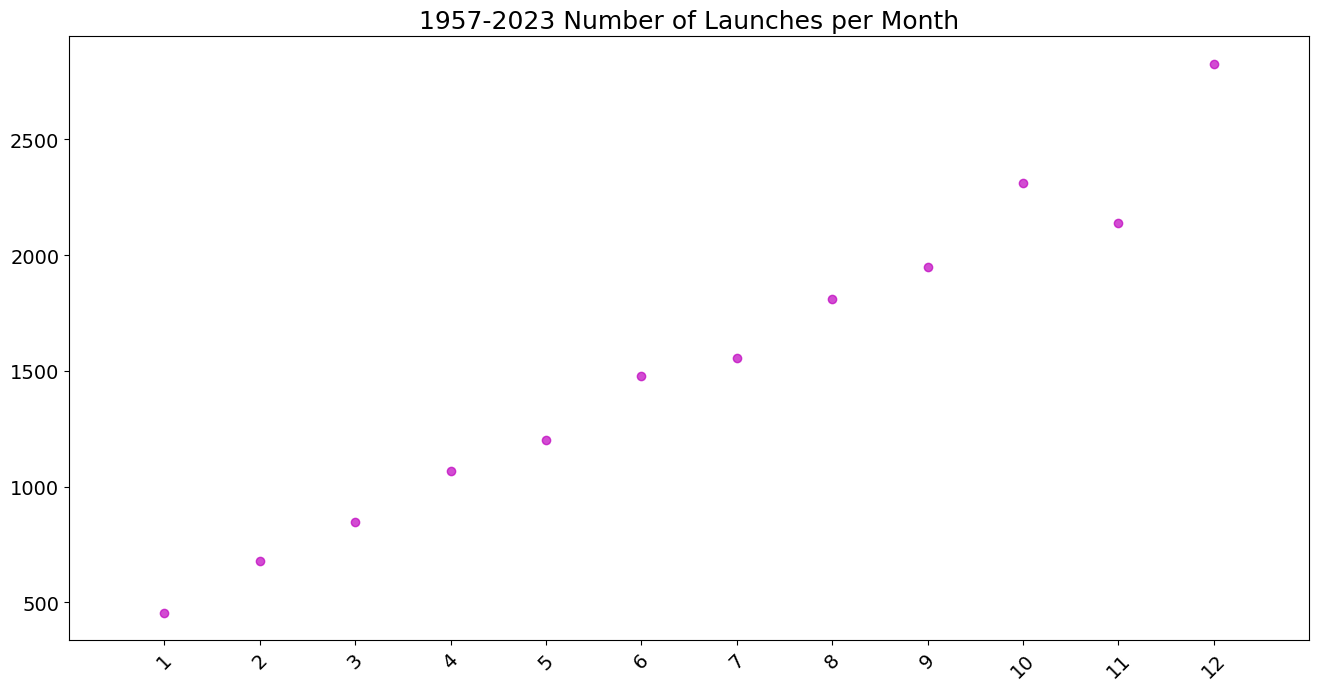

In [ ]:
# Graphing scatter and line chart for moving average by month
plt.figure(figsize=(16,8), dpi=100)
plt.title('1957-2023 Number of Launches per Month', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1, 13, step=1), 
           fontsize=14, 
           rotation=45)

ax = plt.gca()
ax.set_xlim(0, 13)
ax.scatter(x=launch_by_month.index, 
           y=launch_by_month.values, 
           c='m',
           alpha=0.7)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Calling out the data frame which is grouped by month
launch_by_month

Month
1      455
2      681
3      846
4     1067
5     1203
6     1479
7     1554
8     1810
9     1948
10    2310
11    2139
12    2827
Name: Date, dtype: int64

In [ ]:
# Printing out the best month to launch the space mission
best_month_loc = launch_by_month.idxmax()
best_month = pd.to_datetime(best_month_loc, format="%m")
print(f"{best_month.strftime('%B')} is the best month to launch a mission")

December is the best month to launch a mission


# How has the Launch Price varied Over Time? 

In [ ]:
# Creating data frame grouped by year aggreagted by price average to create a chart
avg_price_time = df_clean.groupby("Year").agg({"Price": pd.Series.mean})
avg_price_time

,Price
Year,
1957,6.67
1958,13.07
1959,0.00
1960,71.43
1961,278.53
...,...
2018,48.22
2019,40.25
2020,47.64


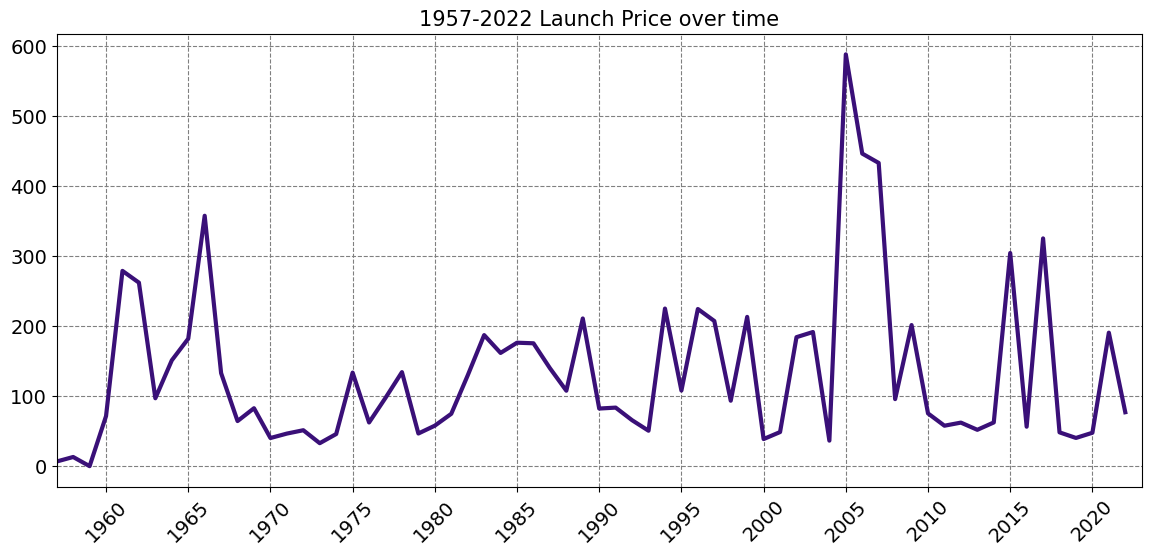

In [ ]:
# Creating a line chart with xticks by year with grid
plt.figure(figsize=(14,6), dpi=100)
plt.title('1957-2022 Launch Price over time', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax1 = plt.gca()
ax1.set_xlim(1957, 2023)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.grid(color='grey', linestyle='--') 
ax1.plot(avg_price_time.index, 
        avg_price_time.values, 
        c="#3A1078", 
        linewidth=3)

plt.show()

# Number of Launches over Time by the Top 10 Organizations. 

How has the dominance of launches changed over time between the different organizations? 

In [ ]:
# Group the mission launches by organization and year, and get the size of year group and count the /
# number of mission launches for each group and renaming it to Count
launch_counts = df_clean.groupby(['Organization', 'Year']).size().reset_index(name='Count')

In [ ]:
# Sort the mission counts by organization and mission year, and select the top 10 organizations
top_10_orgs = launch_counts.groupby('Organization').sum().sort_values(by='Count', ascending=False).head(10).index
top_10_launch_counts = launch_counts[launch_counts.Organization.isin(top_10_orgs)]

In [ ]:
# Reshape the launch counts into a new dataframe with the organization names as columns and the launch years as rows
launch_counts_df = top_10_launch_counts.pivot(index='Year', columns='Organization', values='Count')

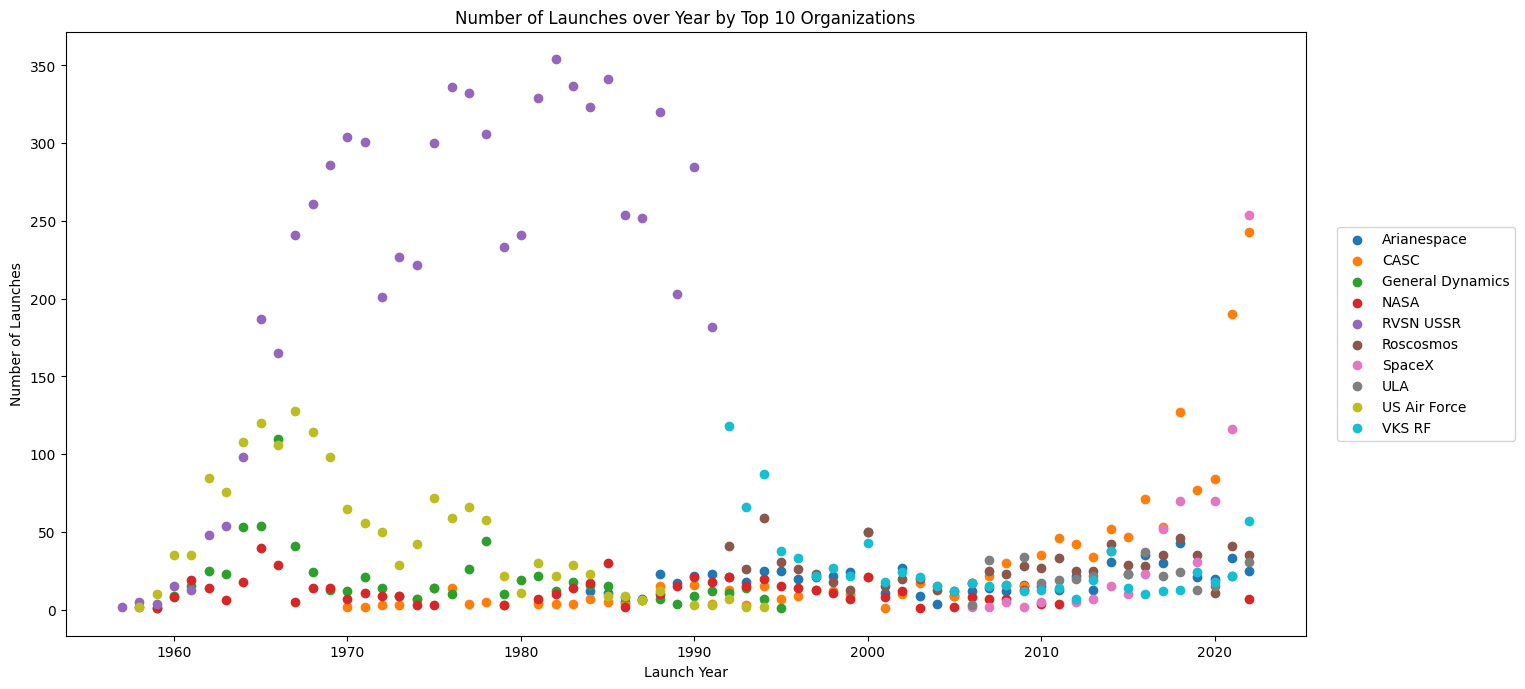

In [ ]:
# Graphing a scatter chart since no organization had a continous mission launches over the time period of 1957-2022
fig, ax2 = plt.subplots(figsize=(16, 8), dpi=100)

for org in launch_counts_df.columns:
    ax2.scatter(launch_counts_df.index, launch_counts_df[org], label=org)

ax2.set_xlabel('Launch Year')
ax2.set_ylabel('Number of Launches')
ax2.set_title('Number of Launches over Year by Top 10 Organizations')
ax2.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.show()

# Cold War Space Race: USA vs Soveit Union(RUS)
<center>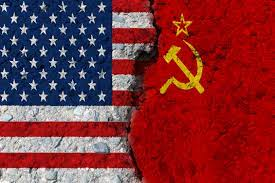</center>
<p>The cold war lasted from the start of the dataset up until December 26th 1991.</p>

In [ ]:
# End of cold war was December 26th of 1991, converting the day to datetime
cold_war_end = pd.to_datetime("1991-12-26")

In [ ]:
# Creating a new data frame which only contains data while cold war and where the country is either USA or Soveit union(RUS)
# In the data frame converted ISO code of countries like Kazakhstan before there idenependence day from Soveit union to RUS
cold_war = df_clean.loc[(df_clean.Date < cold_war_end) & ((df_clean.ISO == "USA") | (df_clean.ISO == "RUS"))]

In [ ]:
# Creating a new data frame after cold war usa vs russia
after_cold_war = df_clean.loc[(df_clean.Date >= cold_war_end) & ((df_clean.ISO == "USA") | (df_clean.ISO == "RUS"))]

## Comparing total number of launches between USA and the Soveit Union(RUS) 


In [ ]:
# Creating a data frame that contain value counts of ISO column during the cold war
us_vs_ussr_cold = cold_war.ISO.value_counts()

In [ ]:
# Plot a pie chart which compares total number of launches between USA and Soveit Union(RUS) during the cold war
plt.figure(figsize=(14,8), dpi=200)
c_pie = px.pie(values=np.array(us_vs_ussr_cold.values), names=us_vs_ussr_cold.index, title="<i><b>1957-1991 US vs Soviet during cold war </b></i>", hole=0.4, width=1000, height=500, color_discrete_sequence=['#362FD9', '#3C84AB'])
c_pie.update_traces(textposition='inside', textfont_size=12)
c_pie.show()

<Figure size 2800x1600 with 0 Axes>

In [ ]:
# Creating a data frame that contain value counts of ISO column after the cold war
us_vs_ussr_warm = after_cold_war.ISO.value_counts()

In [ ]:
# Plot a pie chart which compares total number of launches between USA and Soveit Union(RUS) after the cold war
plt.figure(figsize=(14,8), dpi=200)
w_pie = px.pie(values=np.array(us_vs_ussr_warm.values), 
               names=us_vs_ussr_warm.index, title="<i><b>1991-2022 US vs Soviet after cold war </b></i>",
               hole=0.4, width=1000, height=500, color_discrete_sequence=['#E5BA73', '#FAEAB1'])
w_pie.update_traces(textposition='inside', textfont_size=12)
w_pie.show()

<Figure size 2800x1600 with 0 Axes>

## Total Number of Launches Year-On-Year by the Two US and Soveit Union(RUS)

In [ ]:
# Create a data frame containing only US and Russian launches
us_vs_rus = df_clean.loc[(df_clean.ISO == "USA") | (df_clean.ISO == "RUS")]
us_vs_rus

,Organization,Location,Date,Year,Month,Detail,Rocket_status,Price,Mission_status,Country,ISO
18389,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2022-01-06,2022,1,Falcon 9 Block 5 | Starlink Group 4-5,Active,67.00,Success,United States,USA
6386,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1978-01-10,1978,1,Cosmos-3M | Cosmos 976 to 983,Retired,20.00,Success,Russia,RUS
6385,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1978-01-13,1978,1,Soyuz U | Cosmos 984,Retired,0.00,Success,Russia,RUS
6384,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1978-01-16,1978,1,Cosmos-3M | Cosmos 985,Retired,20.00,Success,Russia,RUS
6383,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1978-01-20,1978,1,Soyuz U | Progress 1,Retired,0.00,Success,Kazakhstan,RUS
...,...,...,...,...,...,...,...,...,...,...,...
3407,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1971-12-27,1971,12,Soyuz M | Cosmos 470,Retired,0.00,Success,Russia,RUS
3406,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1971-12-27,1971,12,Cosmos-3M | Auréole 1,Retired,0.00,Success,Russia,RUS
3405,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1971-12-29,1971,12,Vostok-2M | Meteor n°21,Retired,0.00,Success,Russia,RUS
3417,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1971-12-10,1971,12,Voskhod | Cosmos 464,Retired,0.00,Success,Russia,RUS


In [ ]:
# Group the mission launches by Year and ISO, and get the size of index group and count the /
# number of mission launches for each group and renaming it to Count
yearly_launches = us_vs_rus.groupby(["Year", "ISO"]).size().reset_index(name="Count")

In [ ]:
# Reshape the launch counts into a new dataframe with the ISO as columns and the launch years as rows
yearly_launches_pivot = yearly_launches.pivot(index="Year", columns="ISO", values="Count")
yearly_launches_pivot

ISO,RUS,USA
Year,,
1957,2,1
1958,5,23
1959,4,20
1960,15,55
1961,13,72
...,...,...
2018,29,124
2019,27,61
2020,22,107


In [ ]:
# Graphing a line chart showing year by year mission launches by each country
plt.figure(figsize=(14,8), dpi=200)
yearly_chart = px.line(yearly_launches_pivot.reset_index(), x=yearly_launches_pivot.index, y=["USA", "RUS"],
                       title="<b>1957-2022 Yearly Launches by the USA and Russia</b>")
yearly_chart.update_xaxes(title_text="Year")
yearly_chart.update_yaxes(title_text="Number of Launches")
yearly_chart.show()

<Figure size 2800x1600 with 0 Axes>

## Total Number of Mission Failures Year on Year.




In [ ]:
# Subsetting data frame to contain only data where mission status is failure
failures = df_clean[df_clean['Mission_status'] == 'Failure']

In [ ]:
# Group failures by year and count the number of failures per year
failures_by_year = failures.groupby('Year').count().Mission_status

In [ ]:
# Plot a bar chart for year-on-year count of mission failures
plt.figure(figsize=(14,8), dpi=200)
fig = px.bar(failures_by_year, x=failures_by_year.index, y=failures_by_year.values,
             labels={'x': 'Year', 'y': 'Number of Failures'},
             title='<b>1957-2022 Total Number of Mission Failures Year on Year</b>',
             color = failures_by_year.values,
             color_continuous_scale="viridis")
fig.update_layout(title_x = 0.5)
fig.show()

<Figure size 2800x1600 with 0 Axes>

## Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?





In [ ]:
# Group by year and count it by mission_status so total mission launches despite the results
launches_by_year = df_clean.groupby('Year').count().Mission_status

In [ ]:
# Reusing failures_by_year data frame, failures_by_year group failures by year and count the number of failures per year
failures_by_year

Year
1957     1
1958    20
1959    11
1960    34
1961    31
        ..
2018     8
2019     8
2020    23
2021    46
2022    38
Name: Mission_status, Length: 66, dtype: int64

In [ ]:
# Calculate the percentage of failures for each year
failure_rate = (failures_by_year / launches_by_year) * 100
failure_rate = failure_rate.reset_index()
failure_rate.columns = ['Year', 'Percentage_failures']

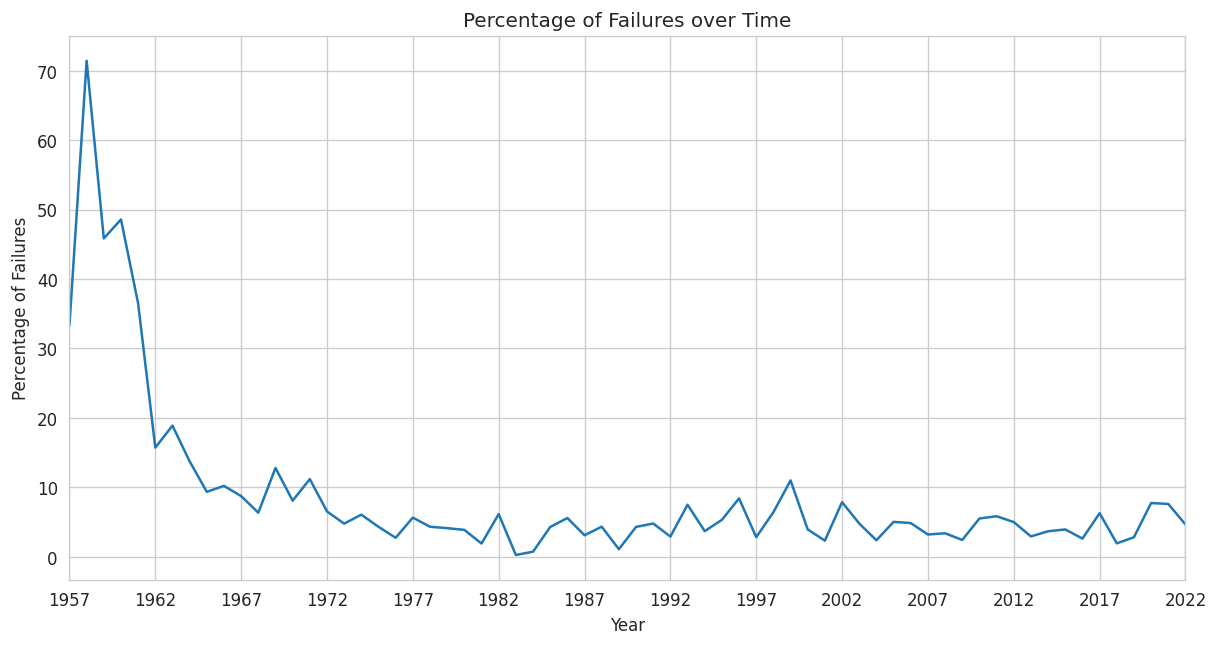

In [ ]:
# Creating the line chart
plt.figure(figsize=(12,6), dpi=120)
with sns.axes_style('whitegrid'):
  ax = sns.lineplot(x='Year', y='Percentage_failures', data=failure_rate)
  ax.set_xlim(1957,2022)
plt.title('Percentage of Failures over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.xticks(ticks=np.arange(1957,2023,5))
plt.show()

# For Every Year which Country was in the Lead in terms of Total Number of Launches

In [ ]:
# Group launches by year and Country(ISO), and count the number of launches in each group
# Grouping by ISO instead of Country due to data for Kazhastan, and some outliers like Pacific Ocean, Gran Caneria, Barents Sea and etc
launches_by_year_ISO = df_clean.groupby(['Year', 'ISO']).size().reset_index(name='Launches')

In [ ]:
# Find the country with the highest number of launches in each year
top_country_by_year = launches_by_year_ISO.loc[launches_by_year_ISO.groupby('Year')['Launches'].idxmax()]

In [ ]:
# Create a stacked bar chart of launches by year and country
plt.figure(figsize=(14,8), dpi=150)
fig = px.bar(launches_by_year_ISO, x='Year', y='Launches', color='ISO', 
             title='<b>1957-2022 Total Number of Launches by Year, by Country</b>',
             color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_yaxes(title_text="Number of Launches")
# Add the top country in each year to the top of the corresponding bar
for year, country in zip(top_country_by_year['Year'], top_country_by_year['ISO']):
    fig.add_annotation(x=year, y=0, text=country, 
                       font=dict(color='white', size=12), 
                       showarrow=False, yshift=15, textangle=90)
fig.show()

<Figure size 2100x1200 with 0 Axes>

Will the reuslt change if only the number of successful launches are counted?


In [ ]:
# Subsetting data frame to contain only data where mission status is success
launches_by_year_success = df_clean[df_clean.Mission_status == "Success"]

In [ ]:
# Group launches by year and Country(ISO), and count the number of launches in each group
launches_by_year_success = launches_by_year_success.groupby(['Year', 'ISO']).size().reset_index(name='Launches')

In [ ]:
# Find the country with the highest number of successful launches in each year
top_country_by_year_success = launches_by_year_success.loc[launches_by_year_success.groupby('Year')['Launches'].idxmax()]

In [ ]:
# Create a stacked bar chart of successful launches by year and country
plt.figure(figsize=(14,8), dpi=150)
fig = px.bar(launches_by_year_success, x='Year', y='Launches', color='ISO', 
             title='<b>1957-2022 Total Number Successful Launches by Year, by Country</b>',
             color_discrete_sequence=px.colors.qualitative.Alphabet)
# Add the top country in each year to the top of the corresponding bar
fig.update_yaxes(title_text="Number of Launches")
for year, country in zip(top_country_by_year_success['Year'], top_country_by_year_success['ISO']):
    fig.add_annotation(x=year, y=0, text=country, 
                       font=dict(color='white', size=12), 
                       showarrow=False, yshift=15, textangle=90)
    
fig.show()

<Figure size 2100x1200 with 0 Axes>

# Year-on-Year Chart Showing the Organization Doing the Most Number of Launches

Which organization was dominant in the 1970s and 1980s? 

In [ ]:
# Subsetting data to contain 
df_70_80 = df_clean[(df_clean.Year >= 1970) & (df_clean.Year < 1990)]

In [ ]:
# Group launches by year and organization, and count the number of launches in each group in 1970s and 1980s
df_grouped = df_70_80.groupby(['Year', 'Organization']).size().reset_index(name='count')

In [ ]:
# Find the country with the highest number of launches in each year in 1970s and 1980s
df_max = df_grouped.loc[df_grouped.groupby('Year')['count'].idxmax()]

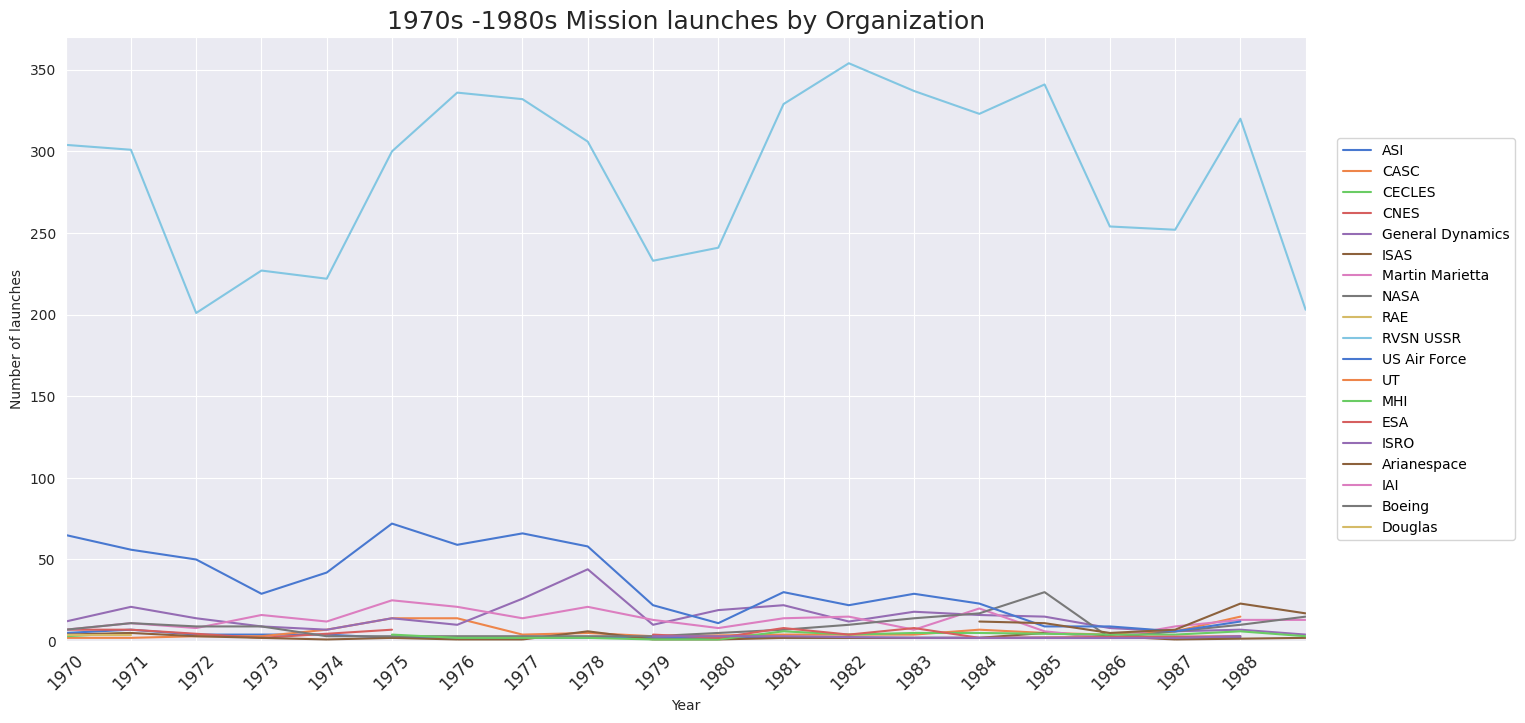

In [ ]:
# Plotting a lineplot to vosualize all the organization who launched mission in 1970s to 1980s
plt.figure(figsize=(16,8),dpi=100)
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(x='Year', y='count', hue='Organization', palette='muted', data=df_grouped)
    ax.set_title('1970s -1980s Mission launches by Organization', fontdict={'fontsize': 18})
    ax.set_xlim(1970, 1989)
    ax.set_ylim(0,370)
    ax.set_ylabel("Number of launches")
plt.xticks(ticks=np.arange(1970, 1989, step=1), fontsize=12, rotation=45)  
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.show()

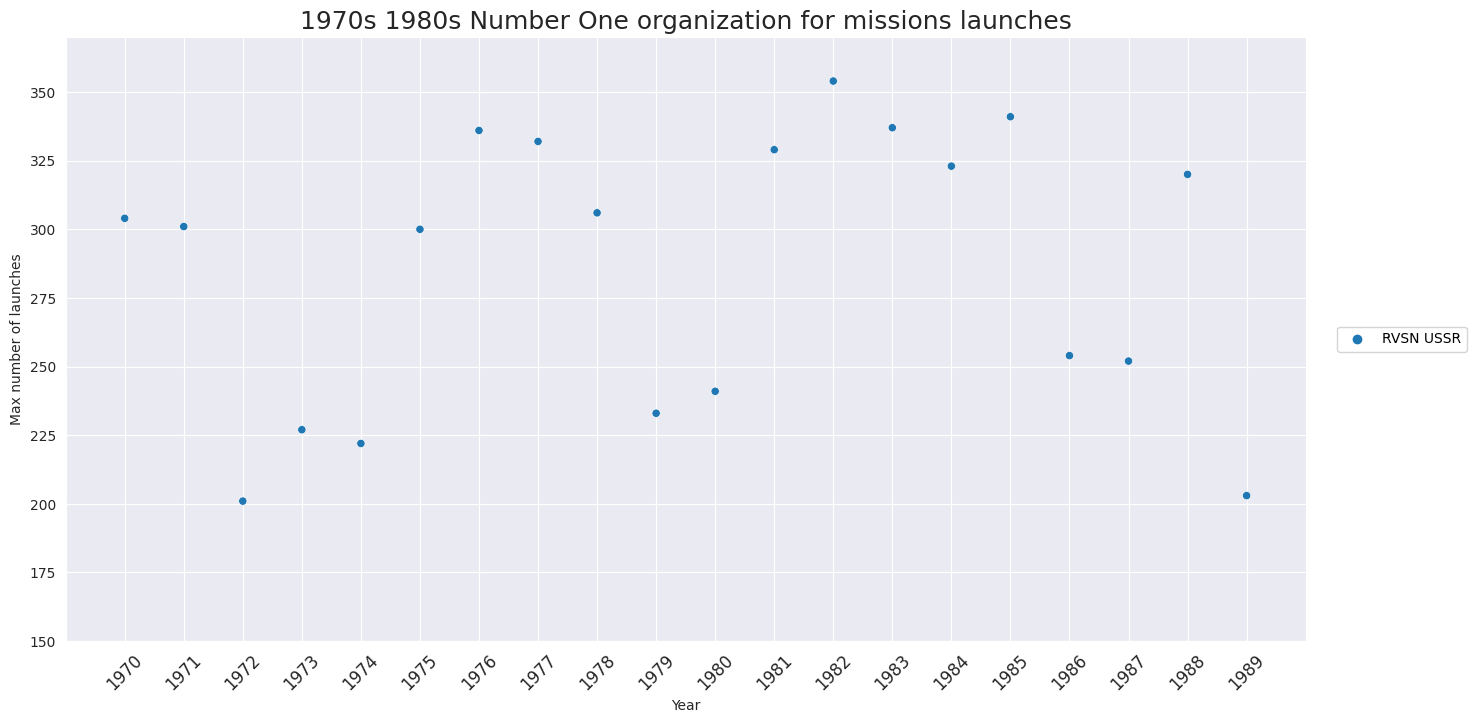

In [ ]:
# Plotting a scatterplot to create dominant organization in 1970s to 1980s
plt.figure(figsize=(16,8),dpi=100)
with sns.axes_style("darkgrid"):
  ax1 =sns.scatterplot(x='Year', y='count', hue='Organization', data=df_max)
  ax1.set_title("1970s 1980s Number One organization for missions launches", fontdict={'fontsize': 18})
  ax1.set_xlim(1969, 1990)
  ax1.set_ylim(150,370)
  ax1.set_ylabel("Max number of launches")
plt.xticks(ticks=np.arange(1970, 1990, step=1), fontsize=12, rotation=45)  
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.show()

Which organization was dominant in 2018, 2019, 2020, 2021, and 2022?




In [ ]:
# Subsettting data to contain mission launches only between 2018-2022
df_18_22 = df_clean[(df_clean.Year >= 2018) & (df_clean.Year <= 2022)]

In [ ]:
# Group launches by year and organization, and count the number of launches in each group between 2018-2022
df_grouped_modern = df_18_22.groupby(['Year', 'Organization']).size().reset_index(name='count')

In [ ]:
# Find the country with the highest number of launches in each year between 2018-2022
df_max_modern = df_grouped_modern.loc[df_grouped_modern.groupby('Year')['count'].idxmax()]

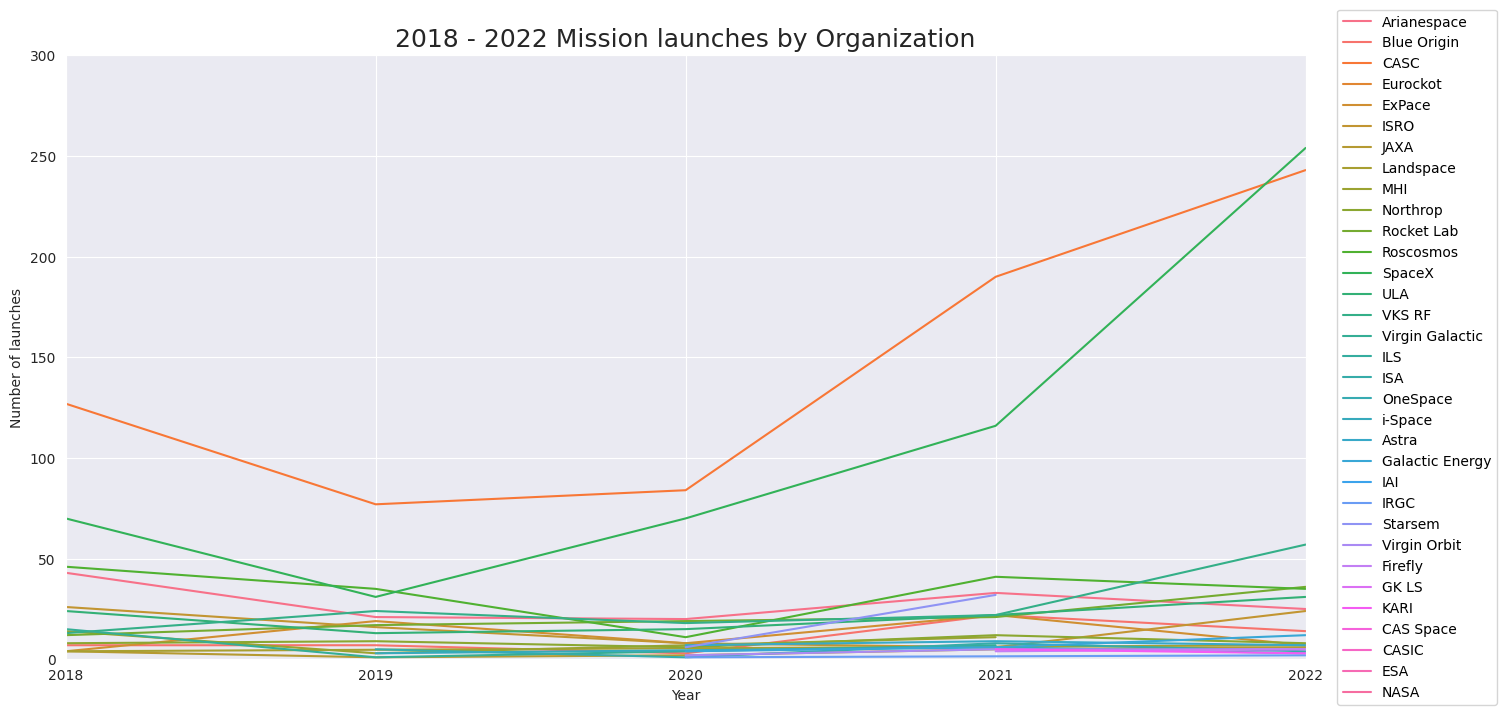

In [ ]:
# Create a lineplot for different organization who launched mission laucnhes trhought 2018-2022
plt.figure(figsize=(16,8),dpi=100)
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(x='Year', y='count', hue='Organization', data=df_grouped_modern)
    ax.set_title('2018 - 2022 Mission launches by Organization', fontdict={'fontsize': 18})
    ax.set_xlim(2018, 2022)
    ax.set_ylim(0,300)
    ax.set_ylabel("Number of launches")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.show()


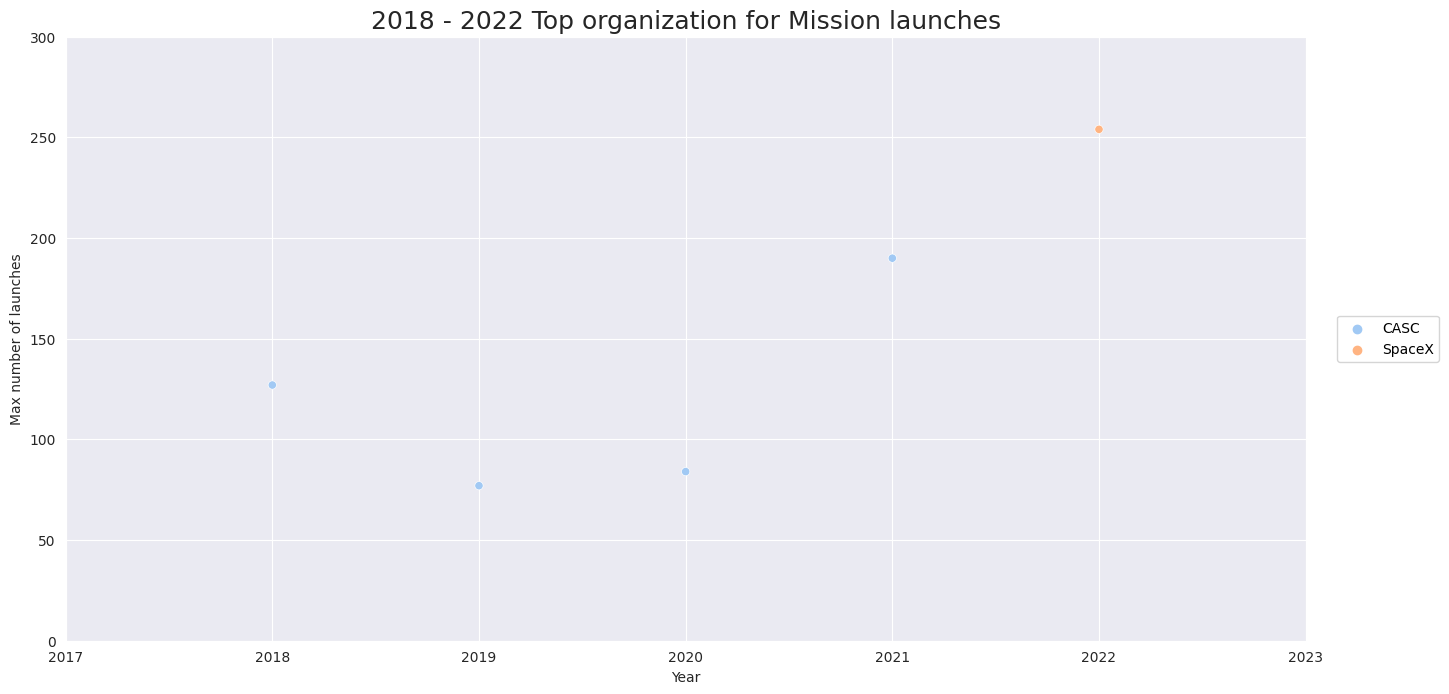

In [ ]:
# Create a scatterplot for dominanat organization throught 2018- 2022
plt.figure(figsize=(16,8),dpi=100)
with sns.axes_style('darkgrid'):
    ax1 = sns.scatterplot(x='Year', y='count', hue='Organization',palette='pastel', data=df_max_modern)
    ax1.set_title('2018 - 2022 Top organization for Mission launches', fontdict={'fontsize': 18})
    ax1.set_xlim(2017, 2023)
    ax1.set_ylim(0,300)
    ax1.set_ylabel("Max number of launches")
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))  
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.show()